In [2]:
#importacion de librerias
import os
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns7
import sklearn.tree 

In [3]:
#cargado la base de datos
accidente = pd.read_csv('Accidentalidad_georreferenciada_2019.csv')

In [4]:
#informacion del data set
accidente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 20 columns):
OBJECTID         30907 non-null int64
X                30907 non-null float64
Y                30907 non-null float64
RADICADO         30907 non-null int64
FECHA            30907 non-null object
HORA             30907 non-null object
DIA              30907 non-null int64
PERIODO          30907 non-null int64
CLASE            30907 non-null object
DIRECCION        30907 non-null object
DIRECCION_ENC    30907 non-null object
CBML             30885 non-null object
TIPO_GEOCOD      30907 non-null object
GRAVEDAD         30907 non-null object
BARRIO           30862 non-null object
COMUNA           30886 non-null object
DISENO           30907 non-null object
DIA_NOMBRE       30907 non-null object
MES              30907 non-null int64
MES_NOMBRE       30907 non-null object
dtypes: float64(2), int64(5), object(13)
memory usage: 4.7+ MB


In [5]:
#parte superior del data set
accidente.head()

,OBJECTID,X,Y,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE
0,709812,831924.55,1183834.57,1674223,2019-06-09T00:00:00.000Z,12:30:00 p. m.,9,2019,Choque,CL 47 CR 78,CL 047 078 000 00000,1112,Malla vial cruce invertido,SOLO DAÑOS,El Velódromo,Laureles Estadio,Tramo de via,DOMINGO,6,JUNIO
1,709813,833355.96,1183133.87,1675562,2019-06-21T00:00:00.000Z,6:50:00 p. m.,21,2019,Choque,CR 65 CL 45,CR 065 045 000 00000,1103,Malla vial,SOLO DAÑOS,Naranjal,Laureles Estadio,Lote o Predio,VIERNES,6,JUNIO
2,709814,835492.78,1183189.30,1661788,2019-02-27T00:00:00.000Z,8:50:00 a. m.,27,2019,Volcamiento,CR 46 CL 53,CR 046 053 000 00000,1019,Malla vial,HERIDO,La Candelaria,La Candelaria,Tramo de via,MIÉRCOLES,2,FEBRERO
3,709815,834064.81,1185110.49,1675911,2019-06-25T00:00:00.000Z,7:00:00 a. m.,25,2019,Choque,CR 65 CL 67,CR 065 067 000 00000,0517,Malla vial,SOLO DAÑOS,Caribe,Castilla,Tramo de via,MARTES,6,JUNIO
4,709816,834602.62,1177898.70,1673388,2019-06-04T00:00:00.000Z,11:30:00 a. m.,4,2019,Choque,CR 43 A CL 1 A Sur,CR 043 A S 001 A 000 00000,1416,Malla vial,SOLO DAÑOS,Alejandría,El Poblado,Tramo de via,MARTES,6,JUNIO


In [6]:
#contando valores de GRAVEDAD
accidente['GRAVEDAD'].value_counts()

HERIDO        16437
SOLO DAÑOS    14311
MUERTO          159
Name: GRAVEDAD, dtype: int64

In [7]:
#columnas del data set
accidente.columns


Index(['OBJECTID', 'X', 'Y', 'RADICADO', 'FECHA', 'HORA', 'DIA', 'PERIODO',
       'CLASE', 'DIRECCION', 'DIRECCION_ENC', 'CBML', 'TIPO_GEOCOD',
       'GRAVEDAD', 'BARRIO', 'COMUNA', 'DISENO', 'DIA_NOMBRE', 'MES',
       'MES_NOMBRE'],
      dtype='object')

In [8]:
#tabla pivote  de graves de accidente por mes
gravedad =pd.pivot_table(accidente, 'MES',['GRAVEDAD'])

In [9]:
gravedad

,MES
GRAVEDAD,
HERIDO,5.357547
MUERTO,5.402516
SOLO DAÑOS,5.169590


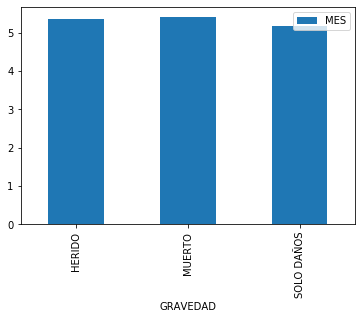

In [10]:
gravedad.plot(kind='bar')

In [23]:
#mostrando casos de solo muertos
accidenete_muerto = accidente[accidente['GRAVEDAD'] == 'MUERTO']

In [24]:
accidenete_muerto 

,OBJECTID,X,Y,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE
288,710118,833806.01,1178010.00,1673935,2019-06-10T00:00:00.000Z,1:10:00 p. m.,10,2019,Choque,CR 49 CL 4 Sur,CR 049 S 004 000 00000,1422,Malla vial,MUERTO,La Aguacatala,El Poblado,Tramo de via,LUNES,6,JUNIO
390,710232,834387.11,1185375.40,1667336,2019-04-14T00:00:00.000Z,2:08:00 p. m.,14,2019,Choque,CR 64 C CL 72,CR 064 C 072 000 00000,0517,Malla vial,MUERTO,Caribe,Castilla,Tramo de via,DOMINGO,4,ABRIL
1256,711157,835002.41,1187784.42,1658008,2019-01-27T00:00:00.000Z,9:26:00 p. m.,27,2019,Choque,CR 64 C CL 97,CR 064 C 097 000 00000,0510,Malla vial,MUERTO,Tricentenario,Castilla,Tramo de via,DOMINGO,1,ENERO
1612,711539,835964.26,1182618.39,1666457,2019-04-08T00:00:00.000Z,6:40:00 a. m.,8,2019,Atropello,CL 50 CR 39,CL 050 039 000 00000,1016,Malla vial,MUERTO,Boston,La Candelaria,Tramo de via,LUNES,4,ABRIL
1772,711715,833468.56,1182783.91,1668856,2019-04-28T00:00:00.000Z,10:31:00 a. m.,28,2019,Choque,CR 63 D CL 42 B,CR 063 D 042 B 000 00000,1105,Malla vial,MUERTO,Los Conquistadores,Laureles Estadio,Tramo de via,DOMINGO,4,ABRIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30318,741719,835096.39,1184715.13,1681912,2019-08-11T00:00:00.000Z,05:00:00 a. m.,11,2019,Atropello,CL 67 CR 53,CL 067 053 000 00000,0407,Malla vial cruce invertido,MUERTO,Sevilla,Aranjuez,Tramo de via,DOMINGO,8,AGOSTO
30466,741884,827864.49,1186490.15,1683932,2019-08-25T00:00:00.000Z,10:44:00 a. m.,25,2019,Atropello,CL 63 CR 128,CL 063 128 000 00000,6000,Malla vial aproximada: CL 64-127,MUERTO,Cabecera Urbana San Cristobal,Corregimiento de San Cristóbal,Tramo de via,DOMINGO,8,AGOSTO
30644,742075,835425.46,1186073.14,1685852,2019-09-08T00:00:00.000Z,02:50:00 a. m.,8,2019,Choque,CR 52 CL 82 A,CR 052 082 A 000 00000,0405,Malla vial cruce invertido,MUERTO,Moravia,Aranjuez,Tramo de via,DOMINGO,9,SEPTIEMBRE
30851,742294,833850.75,1178312.56,1682931,2019-08-17T00:00:00.000Z,02:33:00 a. m.,17,2019,Otro,CR 49 CL 1 Sur,CR 049 S 001 000 00000,1421,Malla vial,MUERTO,Patio Bonito,El Poblado,Tramo de via,SÁBADO,8,AGOSTO


In [25]:
#mostrabdo caso solo daños
accidenete_solo_daños = accidente[accidente['GRAVEDAD'] == 'SOLO DAÑOS']

In [26]:
accidenete_solo_daños

,OBJECTID,X,Y,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE
0,709812,831924.55,1183834.57,1674223,2019-06-09T00:00:00.000Z,12:30:00 p. m.,9,2019,Choque,CL 47 CR 78,CL 047 078 000 00000,1112,Malla vial cruce invertido,SOLO DAÑOS,El Velódromo,Laureles Estadio,Tramo de via,DOMINGO,6,JUNIO
1,709813,833355.96,1183133.87,1675562,2019-06-21T00:00:00.000Z,6:50:00 p. m.,21,2019,Choque,CR 65 CL 45,CR 065 045 000 00000,1103,Malla vial,SOLO DAÑOS,Naranjal,Laureles Estadio,Lote o Predio,VIERNES,6,JUNIO
3,709815,834064.81,1185110.49,1675911,2019-06-25T00:00:00.000Z,7:00:00 a. m.,25,2019,Choque,CR 65 CL 67,CR 065 067 000 00000,0517,Malla vial,SOLO DAÑOS,Caribe,Castilla,Tramo de via,MARTES,6,JUNIO
4,709816,834602.62,1177898.70,1673388,2019-06-04T00:00:00.000Z,11:30:00 a. m.,4,2019,Choque,CR 43 A CL 1 A Sur,CR 043 A S 001 A 000 00000,1416,Malla vial,SOLO DAÑOS,Alejandría,El Poblado,Tramo de via,MARTES,6,JUNIO
5,709817,834066.86,1178428.04,1666474,2019-04-05T00:00:00.000Z,12:20:00 p. m.,5,2019,Choque,CR 48 CL 1,CR 048 001 000 00000,1421,Malla vial,SOLO DAÑOS,Patio Bonito,El Poblado,Tramo de via,VIERNES,4,ABRIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30882,742327,835471.65,1182901.54,1686016,2019-09-03T00:00:00.000Z,04:20:00 p. m.,3,2019,Choque,CR 45 CL 50,CR 045 050 000 00000,1019,Malla vial,SOLO DAÑOS,La Candelaria,La Candelaria,Tramo de via,MARTES,9,SEPTIEMBRE
30883,742328,836481.17,1185039.93,1682130,2019-08-11T00:00:00.000Z,08:30:00 p. m.,11,2019,Choque,CR 45 CL 72,CR 045 072 000 00000,0306,EPM con Interior,SOLO DAÑOS,El Pomar,Manrique,Tramo de via,DOMINGO,8,AGOSTO
30884,742329,835672.91,1181693.60,1680054,2019-07-27T00:00:00.000Z,07:20:00 p. m.,27,2019,Choque,CR 36 A CL 39,CR 036 A 039 000 00000,0912,Malla vial,SOLO DAÑOS,El Salvador,Buenos Aires,Tramo de via,SÁBADO,7,JULIO
30892,742338,835311.12,1188244.36,1682104,2019-08-08T00:00:00.000Z,10:30:00 a. m.,8,2019,Choque,CR 64 CL 103,CR 064 103 000 00000,0508,Malla vial,SOLO DAÑOS,Belalcázar,Castilla,Tramo de via,JUEVES,8,AGOSTO


In [27]:
#mostrando casos de solo heridos
accidenete_herido = accidente[accidente['GRAVEDAD'] == 'HERIDO']

In [28]:
accidenete_herido

,OBJECTID,X,Y,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE
2,709814,835492.78,1183189.30,1661788,2019-02-27T00:00:00.000Z,8:50:00 a. m.,27,2019,Volcamiento,CR 46 CL 53,CR 046 053 000 00000,1019,Malla vial,HERIDO,La Candelaria,La Candelaria,Tramo de via,MIÉRCOLES,2,FEBRERO
7,709819,835524.16,1187948.35,1655464,2019-01-01T00:00:00.000Z,2:30:00 a. m.,1,2019,Caida Ocupante,CR 63 CL 101 C,CR 063 101 C 000 00000,0508,Malla vial,HERIDO,Belalcázar,Castilla,Tramo de via,MARTES,1,ENERO
8,709820,834665.18,1183706.87,1672593,2019-05-29T00:00:00.000Z,5:30:00 p. m.,29,2019,Volcamiento,CL 55 CR 56,CL 055 056 000 00000,1006,Malla vial,HERIDO,San Benito,La Candelaria,Tramo de via,MIÉRCOLES,5,MAYO
11,709823,836524.28,1178700.02,1661151,2019-02-21T00:00:00.000Z,9:00:00 a. m.,21,2019,Choque,CR 25 CL 10 B,CR 025 010 B 000 00000,1408,Malla vial,HERIDO,Altos del Poblado,El Poblado,Interseccion,JUEVES,2,FEBRERO
12,709824,836142.21,1189029.54,1656869,2019-01-17T00:00:00.000Z,5:40:00 a. m.,17,2019,Choque,CR 64 C CL 111,CR 064 C 111 000 00000,0507,Malla vial aproximada: CR 63-111,HERIDO,Héctor Abad Gómez,Castilla,Tramo de via,JUEVES,1,ENERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,742348,836643.56,1183152.39,1687400,2019-09-18T00:00:00.000Z,05:20:00 a. m.,18,2019,Caida Ocupante,CL 59 CR 35,CL 059 035 000 00000,0808,Malla vial aproximada: CL 59-36,HERIDO,Enciso,Villa Hermosa,Lote o Predio,MIÉRCOLES,9,SEPTIEMBRE
30903,742349,832355.14,1179951.78,1680767,2019-08-02T00:00:00.000Z,05:00:00 p. m.,2,2019,Caida Ocupante,CR 69 CL 16,CR 069 016 000 00000,1506,Malla vial aproximada: CR 70-16,HERIDO,Parque Juan Pablo II,Guayabal,Lote o Predio,VIERNES,8,AGOSTO
30904,742350,834073.20,1180390.04,1679283,2019-07-23T00:00:00.000Z,06:00:00 a. m.,23,2019,Caida Ocupante,CR 49 CL 26,CR 049 026 000 00000,1504,Malla vial aproximada: CR 50-25,HERIDO,Santa Fé,Guayabal,Tramo de via,MARTES,7,JULIO
30905,742351,833327.18,1177127.10,1678075,2019-07-13T00:00:00.000Z,01:30:00 p. m.,13,2019,Caida Ocupante,CR 50 CL 12 Sur,CR 050 S 012 000 00000,1510,EPM sin Interior,HERIDO,Guayabal,Guayabal,Lote o Predio,SÁBADO,7,JULIO


In [37]:
#gravedad de accidente por dia 
accidente_DIA_mes=pd.pivot_table(accidente, index = 'GRAVEDAD', columns ='DIA', values ='MES', aggfunc ='mean')

In [38]:
accidente_DIA_mes

DIA,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
GRAVEDAD,,,,,,,,,,,,,,,,,,,,,
HERIDO,5.106695,5.466431,5.547970,5.166355,5.357414,5.730275,5.467562,5.238342,5.409836,5.501825,...,5.167254,5.250478,5.415354,5.280510,5.172727,5.412389,5.419173,5.543981,5.674603,5.605072
MUERTO,4.875000,4.000000,5.500000,5.500000,8.500000,5.625000,5.250000,4.833333,6.000000,5.142857,...,5.000000,4.750000,6.333333,5.333333,6.200000,3.800000,7.416667,5.000000,6.000000,5.000000
SOLO DAÑOS,4.811189,5.448669,5.422374,4.704312,5.481229,5.676471,5.013441,4.895669,5.046218,5.570513,...,4.619048,5.189542,5.366133,5.019565,5.135496,5.475771,4.751693,5.280206,5.516854,5.503106


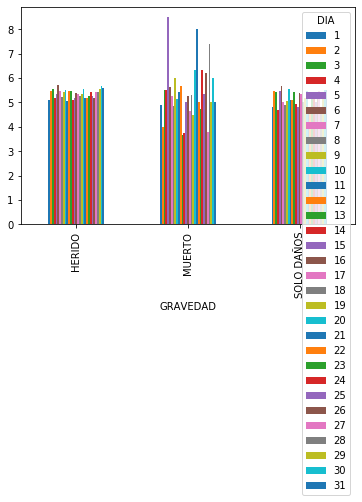

In [39]:
accidente_DIA_mes.plot(kind='bar')

In [22]:
accidenete_muerte = accidente[accidente['GRAVEDAD'] == 'MUERTO']

In [23]:
accidenete_muerte

,OBJECTID,X,Y,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE
288,710118,833806.01,1178010.00,1673935,2019-06-10T00:00:00.000Z,1:10:00 p. m.,10,2019,Choque,CR 49 CL 4 Sur,CR 049 S 004 000 00000,1422,Malla vial,MUERTO,La Aguacatala,El Poblado,Tramo de via,LUNES,6,JUNIO
390,710232,834387.11,1185375.40,1667336,2019-04-14T00:00:00.000Z,2:08:00 p. m.,14,2019,Choque,CR 64 C CL 72,CR 064 C 072 000 00000,0517,Malla vial,MUERTO,Caribe,Castilla,Tramo de via,DOMINGO,4,ABRIL
1256,711157,835002.41,1187784.42,1658008,2019-01-27T00:00:00.000Z,9:26:00 p. m.,27,2019,Choque,CR 64 C CL 97,CR 064 C 097 000 00000,0510,Malla vial,MUERTO,Tricentenario,Castilla,Tramo de via,DOMINGO,1,ENERO
1612,711539,835964.26,1182618.39,1666457,2019-04-08T00:00:00.000Z,6:40:00 a. m.,8,2019,Atropello,CL 50 CR 39,CL 050 039 000 00000,1016,Malla vial,MUERTO,Boston,La Candelaria,Tramo de via,LUNES,4,ABRIL
1772,711715,833468.56,1182783.91,1668856,2019-04-28T00:00:00.000Z,10:31:00 a. m.,28,2019,Choque,CR 63 D CL 42 B,CR 063 D 042 B 000 00000,1105,Malla vial,MUERTO,Los Conquistadores,Laureles Estadio,Tramo de via,DOMINGO,4,ABRIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30318,741719,835096.39,1184715.13,1681912,2019-08-11T00:00:00.000Z,05:00:00 a. m.,11,2019,Atropello,CL 67 CR 53,CL 067 053 000 00000,0407,Malla vial cruce invertido,MUERTO,Sevilla,Aranjuez,Tramo de via,DOMINGO,8,AGOSTO
30466,741884,827864.49,1186490.15,1683932,2019-08-25T00:00:00.000Z,10:44:00 a. m.,25,2019,Atropello,CL 63 CR 128,CL 063 128 000 00000,6000,Malla vial aproximada: CL 64-127,MUERTO,Cabecera Urbana San Cristobal,Corregimiento de San Cristóbal,Tramo de via,DOMINGO,8,AGOSTO
30644,742075,835425.46,1186073.14,1685852,2019-09-08T00:00:00.000Z,02:50:00 a. m.,8,2019,Choque,CR 52 CL 82 A,CR 052 082 A 000 00000,0405,Malla vial cruce invertido,MUERTO,Moravia,Aranjuez,Tramo de via,DOMINGO,9,SEPTIEMBRE
30851,742294,833850.75,1178312.56,1682931,2019-08-17T00:00:00.000Z,02:33:00 a. m.,17,2019,Otro,CR 49 CL 1 Sur,CR 049 S 001 000 00000,1421,Malla vial,MUERTO,Patio Bonito,El Poblado,Tramo de via,SÁBADO,8,AGOSTO


In [24]:
#muertos las diferen clases de accidente al mes
accidenete_muerte = pd.pivot_table(accidente[accidente['GRAVEDAD'] == 'MUERTO'], index = 'CLASE', values='MES')

In [25]:
accidenete_muerte

,MES
CLASE,
Atropello,5.728571
Caida Ocupante,4.000000
Choque,5.074074
Otro,5.200000
Volcamiento,8.500000


In [26]:
#sumatoria de valores de muertos
accidenete_muerte.sum()

MES    28.502646
dtype: float64

In [27]:
#tabla pivote de tipos de accidente su gravedad
accidente_clase=pd.pivot_table(accidente, index = 'CLASE', columns ='GRAVEDAD', values ='MES', aggfunc ='mean')

In [28]:
accidente_clase

GRAVEDAD,HERIDO,MUERTO,SOLO DAÑOS
CLASE,,,
Atropello,5.176576,5.728571,NaN
Caida Ocupante,5.303887,4.000000,NaN
Choque,5.299424,5.074074,5.168445
Incendio,6.000000,NaN,6.250000
Otro,5.572337,5.200000,5.477273
Volcamiento,5.726547,8.500000,5.095238


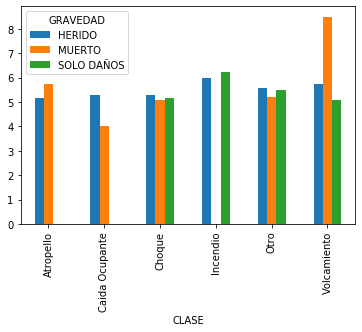

In [29]:
#grafica de clase de accidente y su gravedad
accidente_clase.plot(kind='bar')

<BarContainer object of 6 artists>

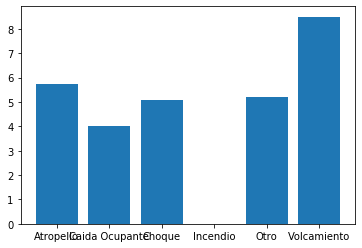

In [30]:
#grafica de barras de clase de accidente en los que hubo muertos
plt.bar(accidente_clase.index,accidente_clase.MUERTO)

In [148]:
#ordenando de mayor a menor 
accidente_clase_sorted = accidente_clase.MUERTO.sort_values()

In [149]:
accidente_clase_sorted

CLASE
Caida Ocupante    4.000000
Choque            5.074074
Otro              5.200000
Atropello         5.728571
Volcamiento       8.500000
Incendio               NaN
Name: MUERTO, dtype: float64

In [153]:
#tabla de accidente een el que hubo atropellado
accidenete_atropello = accidente[accidente['CLASE'] == 'Atropello']

In [154]:
accidenete_atropello

,OBJECTID,X,Y,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE
14,709826,835413.97,1184280.87,1659041,2019-02-04T00:00:00.000Z,9:30:00 p. m.,4,2019,Atropello,CR 51 CL 62,CR 051 062 000 00000,1001,Malla vial,HERIDO,Prado,La Candelaria,Lote o Predio,LUNES,2,FEBRERO
16,709828,832832.84,1178736.66,1655997,2019-01-08T00:00:00.000Z,2:40:00 p. m.,8,2019,Atropello,CL 2 CR 65,CL 002 065 000 00000,1507,Malla vial,HERIDO,Campo Amor,Guayabal,Tramo de via,MARTES,1,ENERO
25,709837,835915.61,1180766.22,1662471,2019-03-04T00:00:00.000Z,3:00:00 p. m.,4,2019,Atropello,CR 30 CL 31,CR 030 031 000 00000,0913,Malla vial cruce invertido,HERIDO,Loreto,Buenos Aires,Tramo de via,LUNES,3,MARZO
31,709843,836144.74,1186810.01,1674674,2019-06-16T00:00:00.000Z,12:10:00 a. m.,16,2019,Atropello,CL 92 CR 50,CL 092 050 000 00000,0402,Malla vial,HERIDO,San Isidro,Aranjuez,Lote o Predio,DOMINGO,6,JUNIO
44,709856,831909.18,1184806.78,1656712,2019-01-15T00:00:00.000Z,5:10:00 p. m.,15,2019,Atropello,CR 80 CL 52,CR 080 052 000 00000,1114,Malla vial,HERIDO,Los Colores,Laureles Estadio,Tramo de via,MARTES,1,ENERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30859,742303,834635.79,1183608.82,1684463,2019-08-28T00:00:00.000Z,05:50:00 p. m.,28,2019,Atropello,CL 53 CR 54,CL 053 054 000 00000,1006,Malla vial,MUERTO,San Benito,La Candelaria,Tramo de via,MIÉRCOLES,8,AGOSTO
30873,742318,833484.35,1188614.81,1678567,2019-07-18T00:00:00.000Z,05:20:00 p. m.,18,2019,Atropello,CR 83 CL 100 F,CR 083 100 F 000 00000,0603,Malla vial aproximada: CR 83-100A,HERIDO,Doce de Octubre No.2,Doce de Octubre,Tramo de via,JUEVES,7,JULIO
30877,742322,829718.57,1186574.24,1678359,2019-07-16T00:00:00.000Z,04:00:00 p. m.,16,2019,Atropello,CL 64 A CR 104,CL 064 A 104 000 00000,6098,Malla vial,HERIDO,Área de Expansión Pajarito,Corregimiento de San Cristóbal,Tramo de via,MARTES,7,JULIO
30886,742332,837658.30,1187757.01,1685489,2019-09-04T00:00:00.000Z,02:10:00 p. m.,4,2019,Atropello,CL 102 C CR 34,CL 102 C 034 000 00000,0104,Malla vial,HERIDO,Granizal,Popular,Tramo de via,MIÉRCOLES,9,SEPTIEMBRE


In [155]:
#media de gravedad de accidente y su codigo geografico
accidente_geo=pd.pivot_table(accidente, index = 'GRAVEDAD', columns = 'TIPO_GEOCOD', values ='MES', aggfunc ='mean')

In [156]:
accidente_geo


TIPO_GEOCOD,EPM con Interior,EPM sin Interior,Malla vial,Malla vial aproximada: CL 1-29,Malla vial aproximada: CL 1-33,Malla vial aproximada: CL 1-35,Malla vial aproximada: CL 1-42,Malla vial aproximada: CL 1-45,Malla vial aproximada: CL 1-53,Malla vial aproximada: CL 10-10,...,Malla vial aproximada: TV 39-79,Malla vial aproximada: TV 39A-33,Malla vial aproximada: TV 45-79B,Malla vial aproximada: TV 61-125,Malla vial aproximada: TV 73-77,Malla vial aproximada: TV 78-65,Malla vial aproximada: TV S 50-63,Malla vial cruce invertido,Nomenclatura con Interior,ZONA RURAL
GRAVEDAD,,,,,,,,,,,,,,,,,,,,,
HERIDO,5.369697,5.622896,5.354828,8.0,NaN,NaN,NaN,4.5,NaN,6.0,...,9.0,NaN,5.0,8.0,NaN,2.0,7.0,5.389554,5.000,5.619048
MUERTO,7.000000,5.250000,5.384615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN
SOLO DAÑOS,5.130841,5.198653,5.167071,4.0,7.0,9.0,4.0,NaN,4.0,8.0,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,5.235521,3.875,1.800000


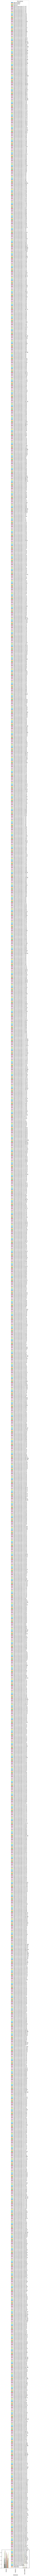

In [161]:
#grafica gravedad de accidente por codigo geografico
accidente_geo.plot(kind='bar')

In [180]:

accidente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 20 columns):
OBJECTID         30907 non-null int64
X                30907 non-null float64
Y                30907 non-null float64
RADICADO         30907 non-null int64
FECHA            30907 non-null object
HORA             30907 non-null object
DIA              30907 non-null int64
PERIODO          30907 non-null int64
CLASE            30907 non-null object
DIRECCION        30907 non-null object
DIRECCION_ENC    30907 non-null object
CBML             30885 non-null object
TIPO_GEOCOD      30907 non-null object
GRAVEDAD         30907 non-null object
BARRIO           30862 non-null object
COMUNA           30886 non-null object
DISENO           30907 non-null object
DIA_NOMBRE       30907 non-null object
MES              30907 non-null int64
MES_NOMBRE       30907 non-null object
dtypes: float64(2), int64(5), object(13)
memory usage: 4.7+ MB


In [181]:
accidente.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 20 columns):
OBJECTID         30907 non-null int64
X                30907 non-null float64
Y                30907 non-null float64
RADICADO         30907 non-null int64
FECHA            30907 non-null object
HORA             30907 non-null object
DIA              30907 non-null int64
PERIODO          30907 non-null int64
CLASE            30907 non-null object
DIRECCION        30907 non-null object
DIRECCION_ENC    30907 non-null object
CBML             30885 non-null object
TIPO_GEOCOD      30907 non-null object
GRAVEDAD         30907 non-null object
BARRIO           30862 non-null object
COMUNA           30886 non-null object
DISENO           30907 non-null object
DIA_NOMBRE       30907 non-null object
MES              30907 non-null int64
MES_NOMBRE       30907 non-null object
dtypes: float64(2), int64(5), object(13)
memory usage: 4.7+ MB


In [183]:

accidente.shape

(30907, 20)

In [185]:
#descripcion de los datos 
accidente.describe

,OBJECTID,X,Y,RADICADO,DIA,PERIODO,MES
count,30907.000000,30907.000000,3.090700e+04,3.090700e+04,30907.000000,30907.0,30907.000000
mean,725554.210632,834067.765396,1.183084e+06,1.672447e+06,15.536157,2019.0,5.270748
std,9714.646144,2170.613147,3.179533e+03,9.838694e+03,8.672516,0.0,2.589949
min,708812.000000,820242.740000,1.172359e+06,1.655108e+06,1.000000,2019.0,1.000000
25%,717152.500000,833029.000000,1.181110e+06,1.663920e+06,8.000000,2019.0,3.000000
50%,725468.000000,834321.710000,1.183081e+06,1.672461e+06,15.000000,2019.0,5.000000
75%,734033.500000,835414.015000,1.185375e+06,1.680976e+06,23.000000,2019.0,8.000000
max,742352.000000,842045.150000,1.196215e+06,1.689537e+06,31.000000,2019.0,9.000000


In [187]:
#datos organizados segun el dia
accidente_sort= accidente.sort_values(by='DIA', ascending=False).head()

In [188]:
accidente_sort

,OBJECTID,X,Y,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE
4875,715046,836189.59,1185306.46,1658570,2019-01-31T00:00:00.000Z,10:00:00 a. m.,31,2019,Choque,CL 76 CR 76 B,CL 076 076 B 000 00000,0410,Malla vial aproximada: CL 76-76,HERIDO,Campo Valdés No. 1,Aranjuez,Interseccion,JUEVES,1,ENERO
29190,740510,834243.20,1183031.98,1685146,2019-08-31T00:00:00.000Z,08:10:00 a. m.,31,2019,Choque,CL 46 CR 57,CL 046 057 000 00000,1007,EPM sin Interior,SOLO DAÑOS,Guayaquil,La Candelaria,Tramo de via,SÁBADO,8,AGOSTO
20401,731035,831627.01,1182517.70,1680390,2019-07-31T00:00:00.000Z,07:40:00 a. m.,31,2019,Choque,CL 37 CR 77,CL 037 077 000 00000,1108,Malla vial,SOLO DAÑOS,Laureles,Laureles Estadio,Glorieta,MIÉRCOLES,7,JULIO
5625,713859,834532.99,1177693.34,1658516,2019-01-31T00:00:00.000Z,12:50:00 p. m.,31,2019,Choque,CR 43 A CL 3 Sur,CR 043 A S 003 000 00000,1416,Malla vial,SOLO DAÑOS,Alejandría,El Poblado,Tramo de via,JUEVES,1,ENERO
14493,724427,836351.37,1181803.84,1672798,2019-05-31T00:00:00.000Z,11:05:00 a. m.,31,2019,Atropello,CR 32 CL 44,CR 032 044 000 00000,0910,Malla vial,HERIDO,La Milagrosa,Buenos Aires,Tramo de via,VIERNES,5,MAYO


(array([3.0000e+00, 5.0000e+00, 4.6600e+02, 3.3200e+02, 1.7800e+03,
        6.1920e+03, 1.4931e+04, 6.4390e+03, 7.5100e+02, 8.0000e+00]),
 array([820242.74 , 822422.981, 824603.222, 826783.463, 828963.704,
        831143.945, 833324.186, 835504.427, 837684.668, 839864.909,
        842045.15 ]),
 <a list of 10 Patch objects>)

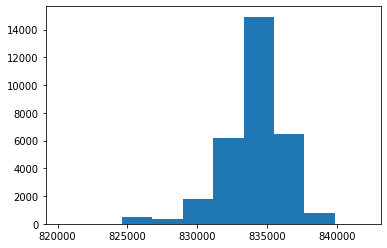

In [194]:
#distribucion de los datos
num_bins =10
plt.hist(accidente['X'],num_bins)

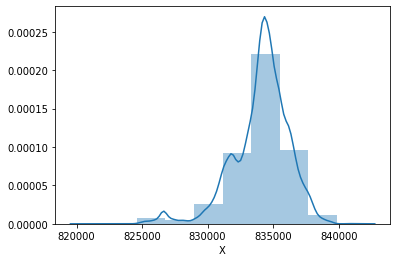

In [197]:
sns7.distplot(accidente['X'],bins=10)

In [37]:
#savando datos numericos
accidente_num = accidente.select_dtypes(include=('float64','int64'))
accidente_num.head()

,OBJECTID,X,Y,RADICADO,DIA,PERIODO,MES
0,709812,831924.55,1183834.57,1674223,9,2019,6
1,709813,833355.96,1183133.87,1675562,21,2019,6
2,709814,835492.78,1183189.30,1661788,27,2019,2
3,709815,834064.81,1185110.49,1675911,25,2019,6
4,709816,834602.62,1177898.70,1673388,4,2019,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191AFB49908>,
      dtype=object)

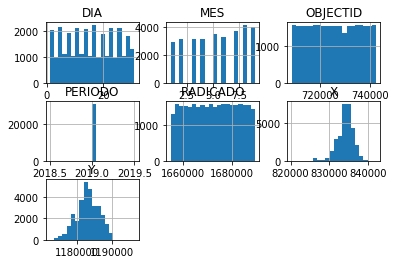

In [38]:
accidente_num.hist(bins=20)

In [39]:
#correlacion
accidente_corr=accidente_num.corr()['Y'][:-1]
accidente_corr

OBJECTID   -0.011348
X           0.262210
Y           1.000000
RADICADO   -0.022196
DIA        -0.011342
PERIODO          NaN
Name: Y, dtype: float64

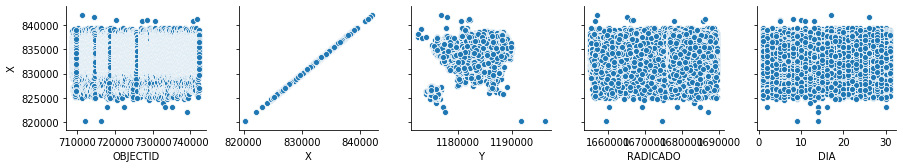

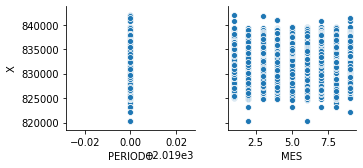

In [40]:
for i in range(0,len(accidente_num.columns),5):
    sns7.pairplot(accidente_num, y_vars=['X'], x_vars=accidente_num.columns[i:i+5])

In [41]:
x=py.array(accidente['X'])


In [42]:
y=accidente['Y']

In [43]:
p4 = py.poly1d(py.polyfit(x, y, 4))

In [44]:
xp = py.linspace(0, 7, 100) 

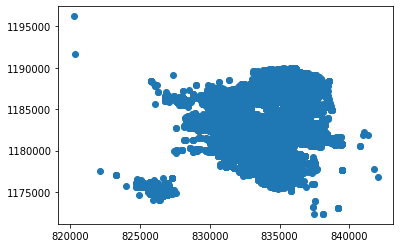

In [45]:
plt.scatter(x, y)  


In [41]:
#herido las diferen clases de accidente al mes
accidenete_herido = pd.pivot_table(accidente[accidente['GRAVEDAD'] == 'HERIDO'], index = 'CLASE', values='MES')
accidenete_herido

,MES
CLASE,
Atropello,5.176576
Caida Ocupante,5.303887
Choque,5.299424
Incendio,6.000000
Otro,5.572337
Volcamiento,5.726547


In [42]:
#herido las diferen clases de accidente al mes
accidenete_solo_daños = pd.pivot_table(accidente[accidente['GRAVEDAD'] == 'SOLO DAÑOS'], index = 'CLASE', values='MES')
accidenete_solo_daños

,MES
CLASE,
Choque,5.168445
Incendio,6.250000
Otro,5.477273
Volcamiento,5.095238
